# STAT MID EXAM

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_1samp,ttest_ind,wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

_________________

# SECTION A: 8 MARKS

_________________

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#7d5b06;">1. Determine the confidence interval of 95% for a random sample of size 400 with mean 196 and standard deviation 16 ?

In [42]:
s = 16
n = 400
se = s/np.sqrt(n)
xbar = 196
# confidence interval = 95%

In [44]:
print(stats.norm.isf(0.025, loc = 0, scale = 1))
print(stats.norm.isf(0.975, loc = 0, scale = 1))

1.9599639845400545
-1.959963984540054


In [45]:
print(stats.norm.isf(0.025, loc = xbar, scale = se))
print(stats.norm.isf(0.975, loc = xbar, scale = se))

197.56797118763205
194.43202881236795


In [46]:
stats.norm.interval(0.95, loc = 196, scale = se)

(194.43202881236795, 197.56797118763205)

In [49]:
lower_interval = xbar - (1.96 * (s / np.sqrt(n)))
upper_interval = xbar + (1.96 * (s / np.sqrt(n)))
print(lower_interval)
print(upper_interval)

194.432
197.568


In [51]:
print('For 95% confidence interval is ', lower_interval, 'to', upper_interval)

For 95% confidence interval is  194.432 to 197.568


_________________

# SECTION B: 17 MARKS

_________________

#### 2.	Multiple myeloma or blood plasma cancer is characterised by increased by blood vessel formulation (angiogenesis) in the bone marrow that is a predictive factor in survival. One treatment approach used for multiple myeloma is stem cell transplantation with the patient’s own stem cells. The data given below represents the bone marrow micro vessel density for patients who had a complete response to the stem cell transplant (as measured by blood and urine tests). The measurements were taken immediately prior to the stem cell transplant and at the time the complete response was determined. (17 MARKS)

|Patient|Before|After|
|--|--|--|
|1|158|284|
|2|189|214|
|3|202|101|
|4|353|227|
|5|416|290|
|6|426|176|
|7|441|290|


a.	At the 0.05 level of significance, is there evidence that the mean bone marrow micro vessel density is higher before the stem cell transplant than after the stem cell transplant? (8 MARKS)

b.	Interpret the meaning of test statistic and p-value from the result. (5 MARKS)

c.	Construct and interpret the 95% confidence interval estimation of the mean difference in bone marrow micro vessel density before and after stem cell transplant. (4 MARKS)

# a

In [56]:
df = pd.DataFrame({'Patient' : [1,2,3,4,5,6,7],
                  'Before' : [158,189,202,353,416,426,441],
                  'After' : [284,214,101,227,290,176,290]})
df

,Patient,Before,After
0,1,158,284
1,2,189,214
2,3,202,101
3,4,353,227
4,5,416,290
5,6,426,176
6,7,441,290


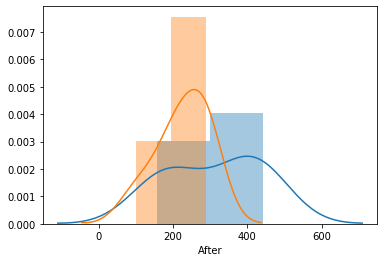

In [64]:
sns.distplot(df['Before'])
sns.distplot(df['After'])
plt.show()

In [ ]:
mb = mean value before treatment
ma = mean value after treatment

Null hypothesis : higher is null : mb > ma
Alternate hypothesis : lower is alternate : mb <= ma

In [58]:
alpha = 0.05  # as sample size < 30 and std is unknown

In [59]:
stats.ttest_ind(df['Before'], df['After'])

Ttest_indResult(statistic=1.5924264925560603, pvalue=0.13727358967931683)

In [63]:
stats.ttest_rel(df['Before'], df['After'])

Ttest_relResult(statistic=1.8424550291027728, pvalue=0.11498626687185708)

# b

In [61]:
print('P value')
print(stats.ttest_ind(df['Before'], df['After'])[1])
print('P value is greater than 5%, Hence Fail to reject null')

P value
0.13727358967931683
P value is greater than 5%, Hence Fail to reject null


INFERENCE

As p value is more than alpha the fail to reject null,

i.e. Mean value of bone marrow in the vessel reduce after the treatment

# c

_________________

# SECTION C: 25 MARKS

_________________

<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#7d5b06;"> 3. A dice is thrown 132 times with the following results. Is the dice unbiased? solve the problem with following steps :
    
| Number turned up:|Frequency |
| ------|  ------ |
|1|16|
|2|20|
|3|25|
|4|14|
|5|29|
|6|28|
    

A. Create contigency table( 3 mark) 

B. State Null and Alternate Hypothesis(3 mark)

C. Find Expected values( 5 marks)

D. FInd Chisquare statistic( 7 marks)

E. USe Critical value and P value approach to make a decision.( 7 marks) 


# A. Create contigency table

In [40]:
c_t = {'Number turned up:': [1,2,3,4,5,6],
     'Frequency': [16,20,25,14,29,28]}
ct = pd.DataFrame(c_t)
ct

,Number turned up:,Frequency
0,1,16
1,2,20
2,3,25
3,4,14
4,5,29
5,6,28


# B. State Null and Alternate Hypothesis

H0 = The dice is unbiased

H = The dice is biased

# C. Find Expected values

In [39]:
p = 1/6
t = 132
expected_frequency = p*t
expected_frequency

22.0

In [29]:
ct['expected frequency'] = [22,22,22,22,22,22]
ct

,Number turned up:,Frequency,expected frequency
0,1,16,22
1,2,20,22
2,3,25,22
3,4,14,22
4,5,29,22
5,6,28,22


# D. FInd Chisquare statistic

In [38]:
ct['(o-e)^2'] = (ct['Frequency'] - ct['expected frequency'])**2
ct

,Number turned up:,Frequency,expected frequency,(o-e)^2
0,1,16,22,36
1,2,20,22,4
2,3,25,22,9
3,4,14,22,64
4,5,29,22,49
5,6,28,22,36


In [34]:
cs = np.sum(ct['(o-e)^2'] / ct['expected frequency'])
print('The Chisquare statistic is : ', cs)

The Chisquare statistic is :  9.0


# E. USe Critical value and P value approach to make a decision.

In [37]:
stats.chisquare(ct['Frequency'], ct['expected frequency'])

Power_divergenceResult(statistic=9.0, pvalue=0.1090641579497725)

In [36]:
### DF = (n-1) = (6-1) = 5
### Alpha = 5%
cc = stats.chi2.isf(0.05, 5)
print('The chisquare critical is : ', cc)

The chisquare critical is :  11.070497693516355


INFERENCE

Since the chisquare is more than chisquare stats (p_value > 0.05),
hence we fail to reject the null hypothesis and conclude that dice is unbiased.